Basic Image Enhancement Using Mathematical Operations
Image Processing techniques take advantage of mathematical operations to achieve different results. Most often we arrive at an enhanced version of the image using some basic operations. We will take a look at some of the fundamental operations often used in computer vision pipelines. In this notebook we will cover:

Arithmetic Operations like addition, multiplication
Thresholding & Masking
Bitwise Operations like OR, AND, XOR

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image
%matplotlib inline


In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)
    
    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

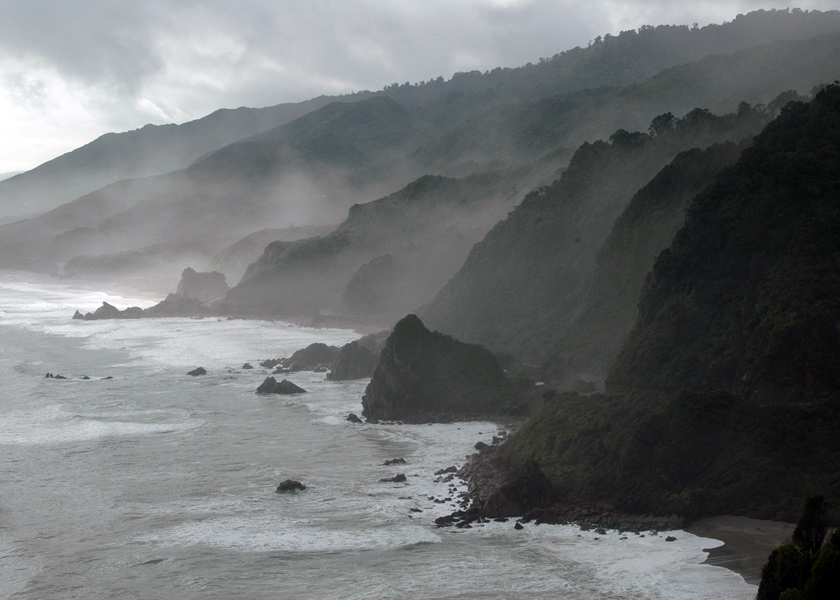

In [4]:
image_bgr = cv2.imread("New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

#Displaying the image
Image(filename='New_Zealand_Coast.jpg')

Addition or Brightness
The first operation we discuss is simple addition of images. This results in increasing or decreasing the brightness of the image since we are eventually increasing or decreasing the intensity values of each pixel by the same amount. So, this will result in a global increase/decrease in brightness.

Text(0.5, 1.0, 'Dark Image')

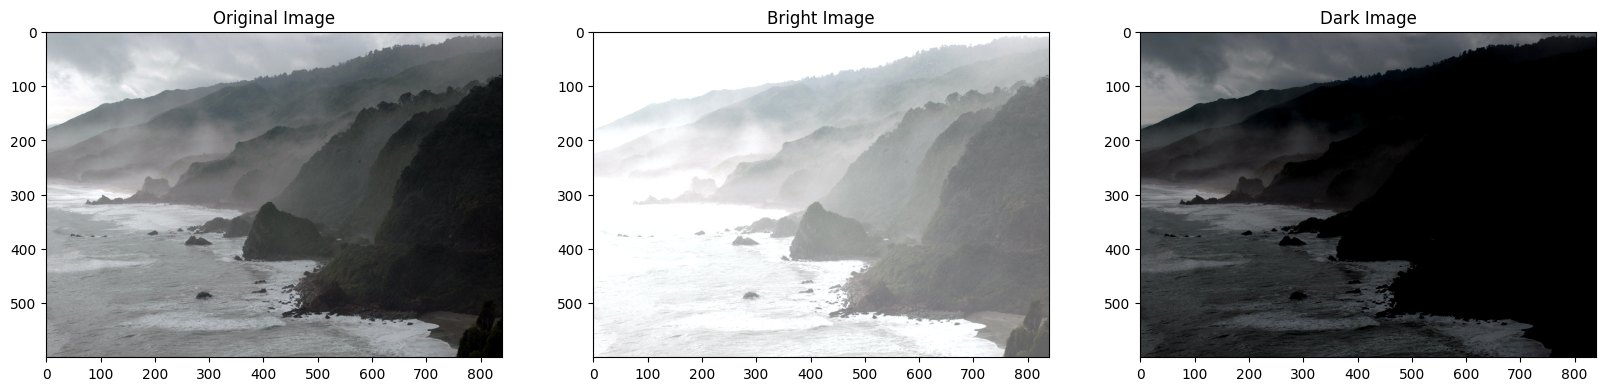

In [6]:
matrix = np.ones(image_rgb.shape,dtype="uint8") * 100

image_rgb_bright = cv2.add(image_rgb,matrix)
image_rgb_dark = cv2.subtract(image_rgb,matrix)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1);plt.imshow(image_rgb);plt.title("Original Image")
plt.subplot(1,3,2);plt.imshow(image_rgb_bright);plt.title("Bright Image")
plt.subplot(1,3,3);plt.imshow(image_rgb_dark);plt.title("Dark Image")

Multiplication or Contrast
Just like addition can result in brightness change, multiplication can be used to improve the contrast of the image.

Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

Text(0.5, 1.0, 'Less Contrast Image')

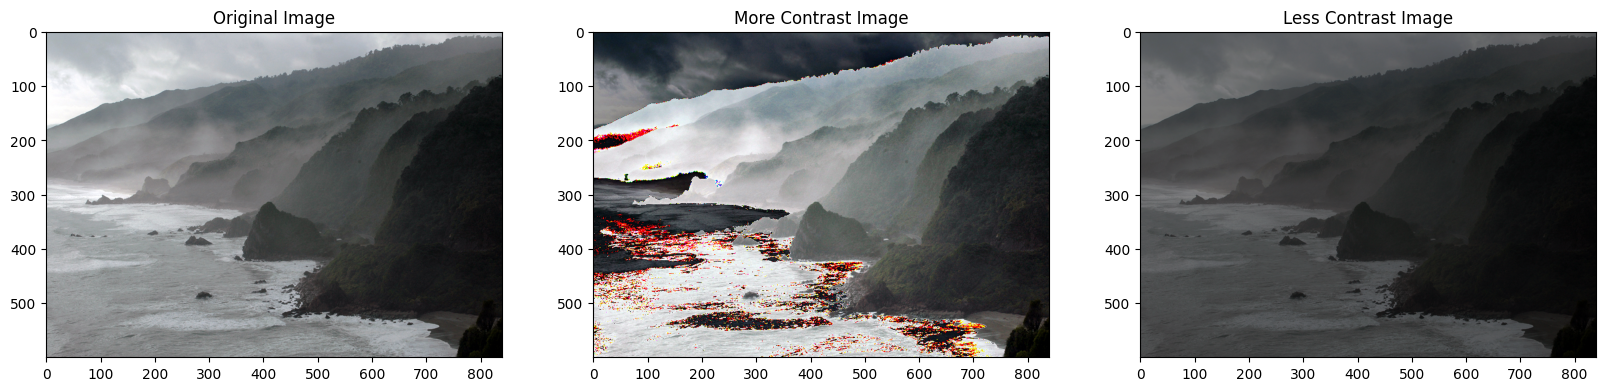

In [14]:
matrix2 = np.ones(image_rgb.shape) * 0.5 #float64
matrix1 = np.ones(image_rgb.shape) * 1.6 #float64

image_rgb_morecontrast = np.uint8(cv2.multiply(np.float64(image_rgb),matrix1))
image_rgb_lesscontrast = np.uint8(cv2.multiply(np.float64(image_rgb),matrix2))

plt.figure(figsize=(20,10))
plt.subplot(1,3,1);plt.imshow(image_rgb);plt.title("Original Image")
plt.subplot(1,3,2);plt.imshow(image_rgb_morecontrast);plt.title("More Contrast Image")
plt.subplot(1,3,3);plt.imshow(image_rgb_lesscontrast);plt.title("Less Contrast Image")

Text(0.5, 1.0, 'Less Contrast Image')

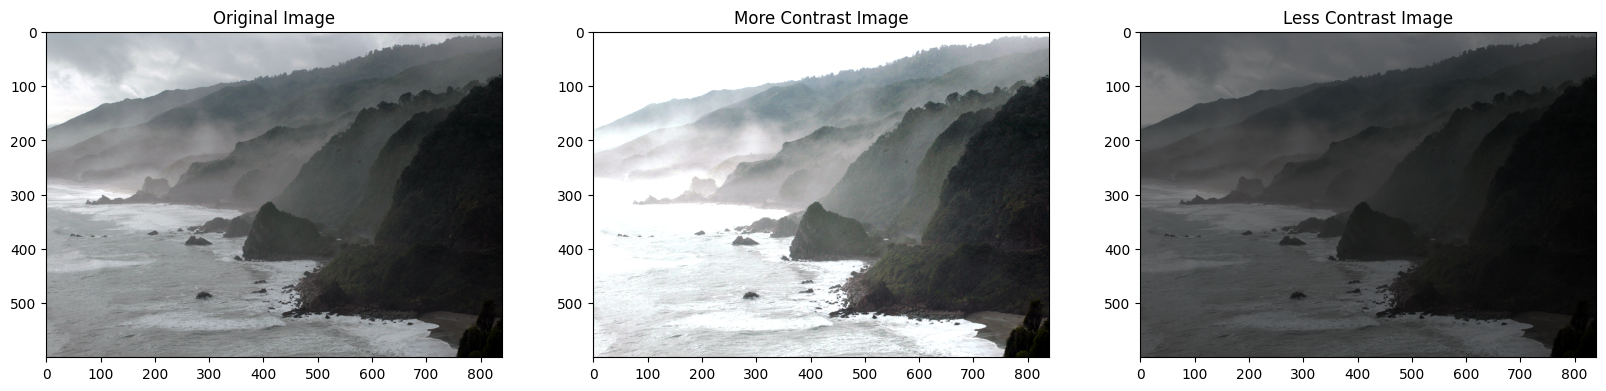

In [18]:
matrix2 = np.ones(image_rgb.shape) * 0.5 #float64
matrix1 = np.ones(image_rgb.shape) * 1.6 #float64

image_rgb_morecontrast = np.uint8(np.clip(cv2.multiply(np.float64(image_rgb),matrix1),0,255))
image_rgb_lesscontrast = np.uint8(np.clip(cv2.multiply(np.float64(image_rgb),matrix2),0,255))

plt.figure(figsize=(20,10))
plt.subplot(1,3,1);plt.imshow(image_rgb);plt.title("Original Image")
plt.subplot(1,3,2);plt.imshow(image_rgb_morecontrast);plt.title("More Contrast Image")
plt.subplot(1,3,3);plt.imshow(image_rgb_lesscontrast);plt.title("Less Contrast Image")

Image Thresholding
Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image.

Function Syntax
retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )
dst: The output array of the same size and type and the same number of channels as src.

The function has 4 required arguments:

src: input array (multiple-channel, 8-bit or 32-bit floating point).

thresh: threshold value.

maxval: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

type: thresholding type (see ThresholdTypes).

Function Syntax
dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )
dst Destination image of the same size and the same type as src.

The function has 6 required arguments:

src: Source 8-bit single-channel image.

maxValue: Non-zero value assigned to the pixels for which the condition is satisfied

adaptiveMethod: Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.

thresholdType: Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.

blockSize: Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.

C: Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

[[168 167 166 ... 113  97  90]
 [169 169 168 ... 184 182 174]
 [167 165 163 ... 173 172 173]
 ...
 [ 36  36  36 ... 108 108 108]
 [ 36  36  36 ... 109 109 109]
 [ 36  36  36 ... 109 109 110]]
[[255 255 255 ... 255   0   0]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


Text(0.5, 1.0, 'Threshold Image')

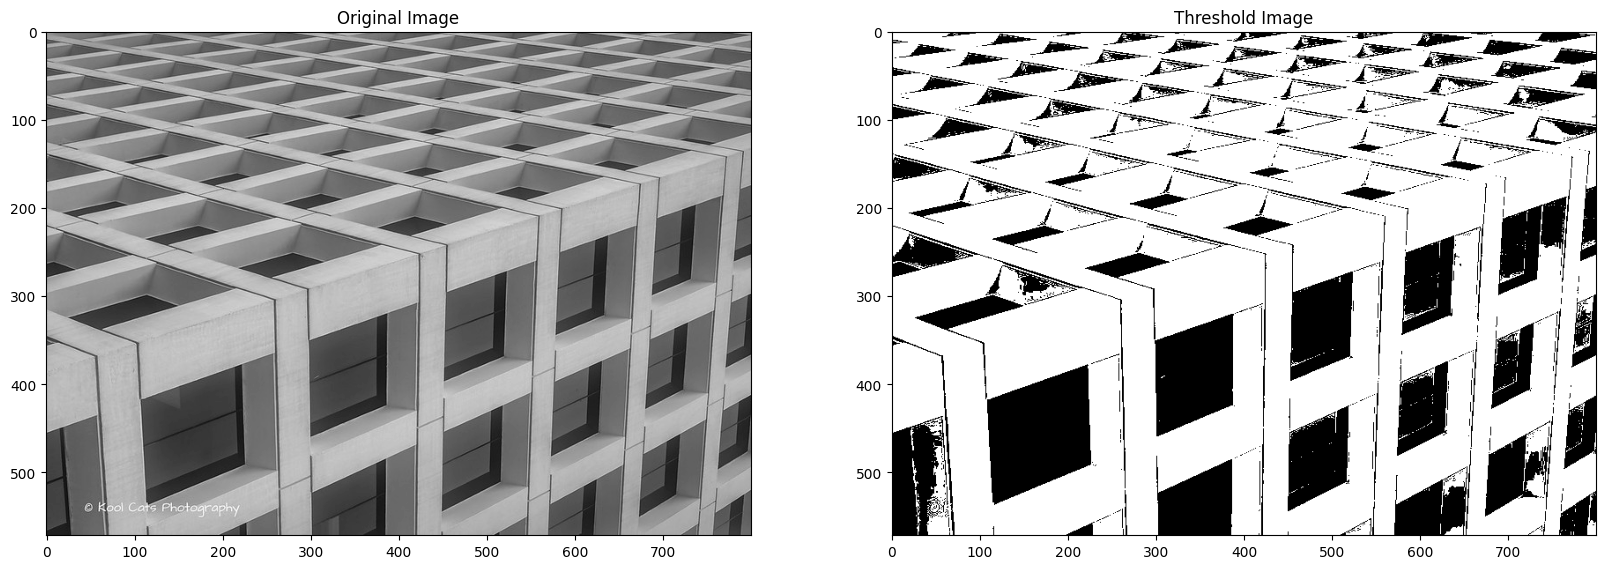

In [84]:
image_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_threshold = cv2.threshold(image_read,100,255,cv2.THRESH_BINARY)
print(image_read)
print(img_threshold)

#Showing the image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1);plt.imshow(image_read,cmap="gray");plt.title("Original Image")
plt.subplot(1,2,2);plt.imshow(img_threshold,cmap="gray");plt.title("Threshold Image")


Application: Sheet Music Reader
Suppose you wanted to build an application that could read (decode) sheet music. This is similar to Optical Character Recognigition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding techniques. Let's take a look at an example.

Text(0.5, 1.0, 'Adaptive Threshold Image')

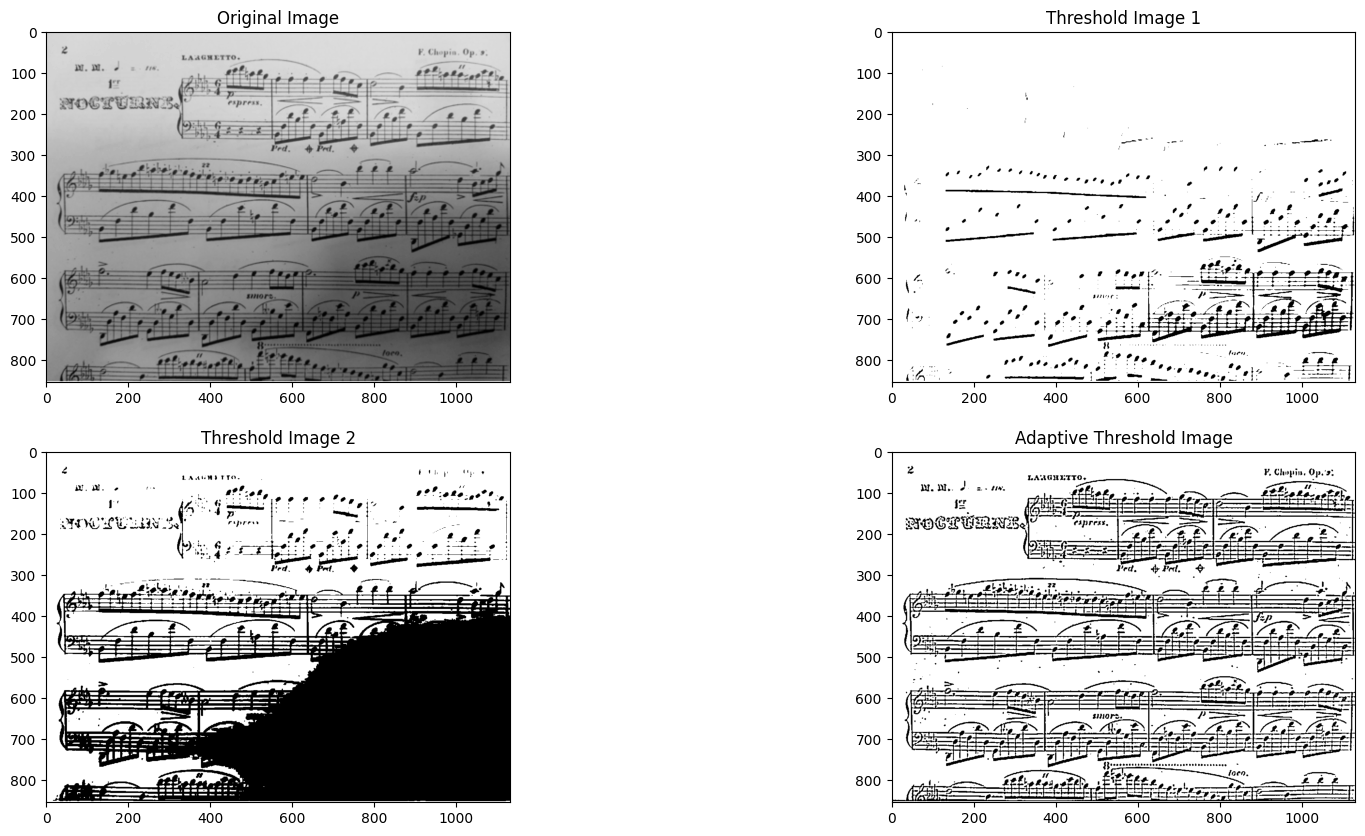

In [35]:
image_music = cv2.imread("Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

#perform global thresholding
retval_1,image_music_threshold_1 = cv2.threshold(image_music, 50, 255, cv2.THRESH_BINARY)

retval_2, image_music_threshold_2 = cv2.threshold(image_music, 130, 255, cv2.THRESH_BINARY)

#adaptive thresholding

image_music_adaptive_threshold = cv2.adaptiveThreshold(image_music,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,5)
#adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
#C – Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.


plt.figure(figsize=(20,10))
plt.subplot(2,2,1);plt.imshow(image_music,cmap="gray");plt.title("Original Image")
plt.subplot(2,2,2);plt.imshow(image_music_threshold_1,cmap="gray");plt.title("Threshold Image 1")
plt.subplot(2,2,3);plt.imshow(image_music_threshold_2,cmap="gray");plt.title("Threshold Image 2")
plt.subplot(2,2,4);plt.imshow(image_music_adaptive_threshold,cmap="gray");plt.title("Adaptive Threshold Image")



Bitwise Operations
Function Syntax
Example API for cv2.bitwise_and(). Others include: cv2.bitwise_or(), cv2.bitwise_xor(), cv2.bitwise_not()

dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
dst: Output array that has the same size and type as the input arrays.

The function has 2 required arguments:

src1: first input array or a scalar.

src2: second input array or a scalar.

An important optional argument is:

mask: optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.
OpenCV Documentation


Rectangle Image Shape:  (200, 499)


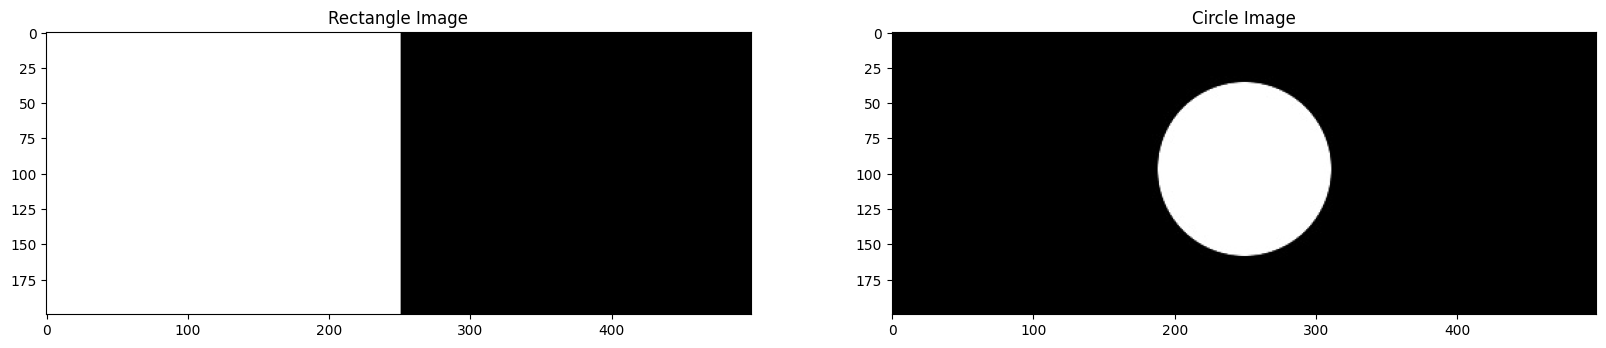

In [36]:
image_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)

image_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1);plt.imshow(image_rec,cmap="gray");plt.title("Rectangle Image")
plt.subplot(1,2,2);plt.imshow(image_cir,cmap="gray");plt.title("Circle Image")
print("Rectangle Image Shape: ",image_rec.shape)

Text(0.5, 1.0, 'Bitwise AND Image')

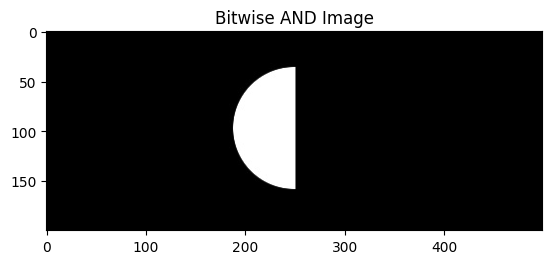

In [37]:
result = cv2.bitwise_and(image_rec,image_cir, mask=None)
plt.imshow(result,cmap="gray");plt.title("Bitwise AND Image")

Text(0.5, 1.0, 'Bitwise OR Image')

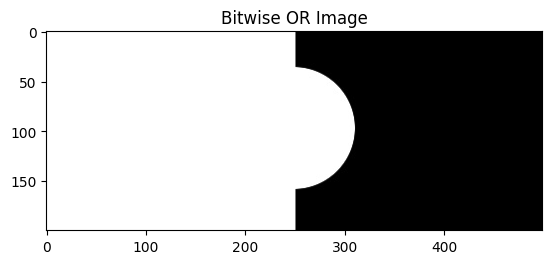

In [38]:
result_or = cv2.bitwise_or(image_rec,image_cir, mask=None)
plt.imshow(result_or,cmap="gray");plt.title("Bitwise OR Image")

Text(0.5, 1.0, 'Bitwise XOR Image')

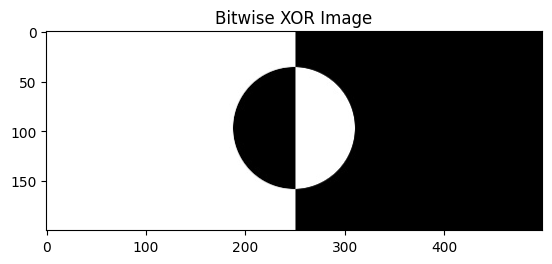

In [39]:
result_xor = cv2.bitwise_xor(image_rec,image_cir, mask=None)
plt.imshow(result_xor,cmap="gray");plt.title("Bitwise XOR Image")

Application: Logo Manipulation
In this section we will show you how to fill in the white lettering of the Coca-Cola logo below with a background image.

(700, 700, 3)


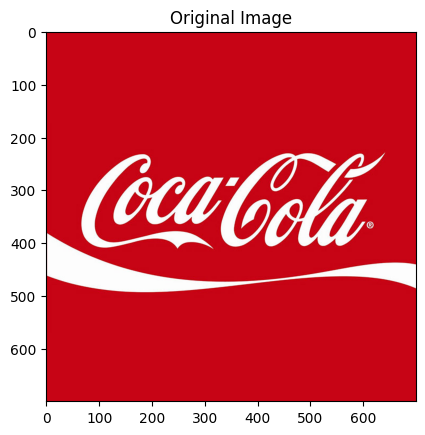

In [40]:
image_bgr = cv2.imread("coca-cola-logo.png", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb);plt.title("Original Image")
print(image_rgb.shape)
logo_w = image_rgb.shape[0]
logo_h = image_rgb.shape[1]

(700, 700, 3)


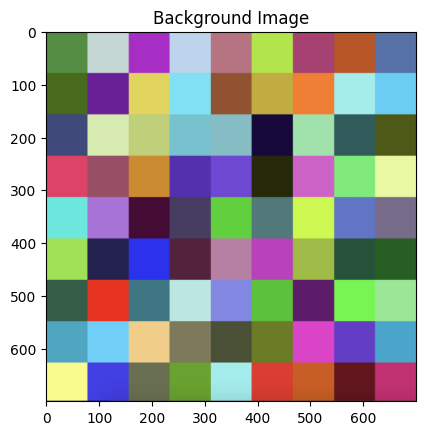

In [43]:
image_background_bgr = cv2.imread("checkerboard_color.png", cv2.IMREAD_COLOR)
image_background_rgb = cv2.cvtColor(image_background_bgr, cv2.COLOR_BGR2RGB)

#set desired width as the logo width and keep the aspect ratio same
aspect_ratio = logo_w / image_background_rgb.shape[1]
dim = (logo_w, int(image_background_rgb.shape[0]*aspect_ratio))

#resize the image
image_background_rgb = cv2.resize(image_background_rgb, dim, interpolation = cv2.INTER_AREA)


plt.imshow(image_background_rgb);plt.title("Background Image")
print(image_background_rgb.shape)

(700, 700)
[[64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]
 ...
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]]


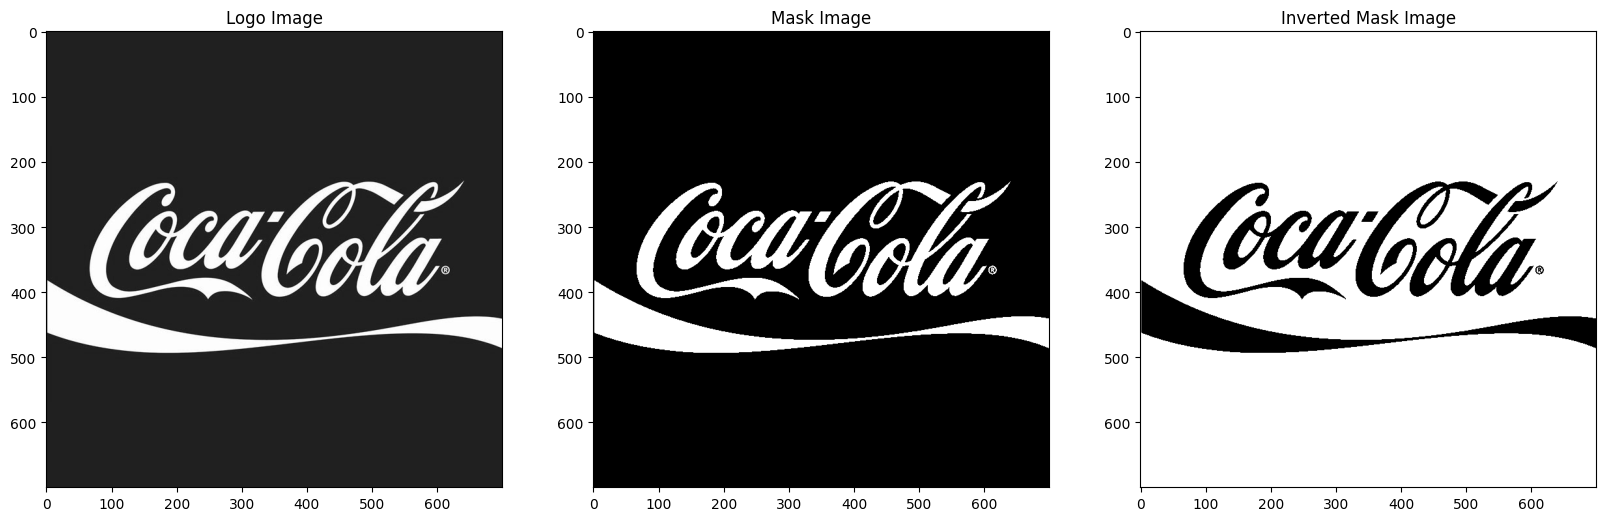

In [74]:
image_logo_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(image_logo_gray,cmap="gray");plt.title("Logo Image")

#Create binary mask of the logo
retval,image_mask = cv2.threshold(image_logo_gray, 128, 255, cv2.THRESH_BINARY)
plt.subplot(1,3,2); plt.imshow(image_mask,cmap="gray");plt.title("Mask Image")
print(image_mask.shape)

#Invert the mask
image_mask_inv = cv2.bitwise_not(image_mask)
plt.subplot(1,3,3); plt.imshow(image_mask_inv,cmap="gray");plt.title("Inverted Mask Image")

print(image_logo_gray)

Text(0.5, 1.0, 'Colored Logo Image')

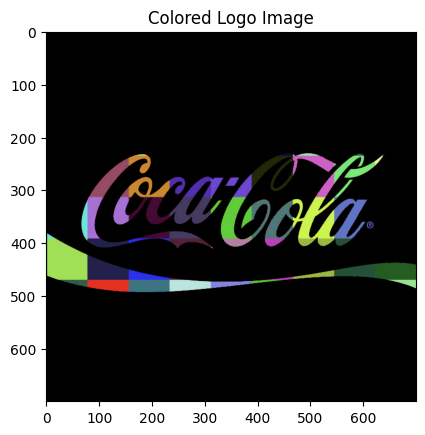

In [67]:
logo_colored = cv2.bitwise_and(image_background_rgb, image_rgb,mask=image_mask)
plt.imshow(logo_colored);plt.title("Colored Logo Image")

Text(0.5, 1.0, 'Foreground Image')

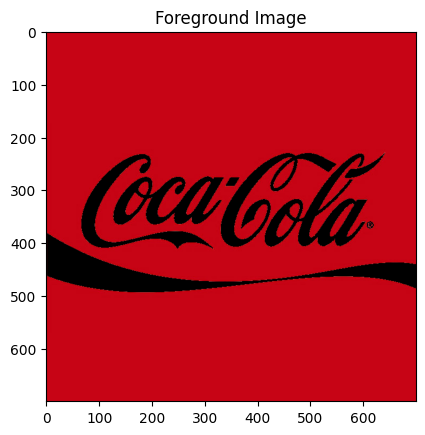

In [71]:
#red foreground
image_foreground = cv2.bitwise_and(image_rgb,image_rgb,mask=image_mask_inv)
plt.imshow(image_foreground);plt.title("Foreground Image")

Text(0.5, 1.0, 'Final Image')

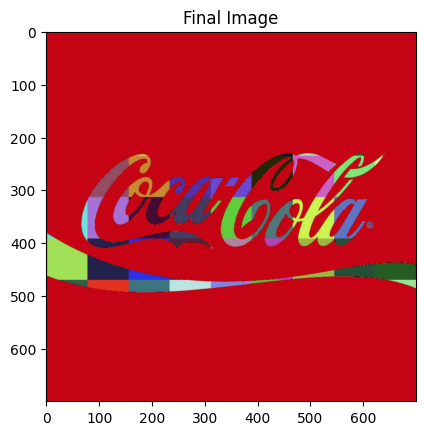

In [72]:
#Just add the two images
reult_final = cv2.add(logo_colored,image_foreground)
plt.imshow(reult_final);plt.title("Final Image")